In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My\ Drive/Computer\ Vision/Assignment\ 1

/content/drive/My Drive/Computer Vision/Assignment 1


In [4]:
!ls

Assignment-1.pdf  image_2.png  q1.ipynb  q3.ipynb  q6.ipynb  sharingan.jpg
image_1.jpg	  image_3.png  q2.ipynb  q4.ipynb  q7.ipynb


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
image = cv2.imread('image_3.png')

([], <a list of 0 Text yticklabel objects>)

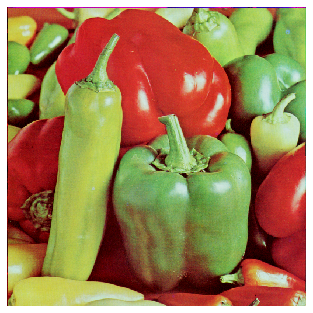

In [7]:
image=image[..., ::-1]/255
plt.imshow(image)
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [0]:
filter_size = 15
padding = int((filter_size-1)/2)

In [0]:
padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding, image.shape[2]))
padded_image[padding: image.shape[0] + padding, padding: image.shape[1] + padding, :] = image

new_image = np.zeros(image.shape)

In [0]:
sigma = 10
side = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
x, y = np.meshgrid(side, side)
filter_gauss = np.exp(-(x**2 + y**2) / (2. * sigma**2))
filter_gauss = filter_gauss / np.sum(filter_gauss)

In [0]:
for channel in range(image.shape[2]):
    for i in range(padding,image.shape[0] + padding):
        for j in range(padding,image.shape[1] + padding):
            new_image[i-padding][j-padding][channel] = np.sum(padded_image[i-padding:i+padding + 1, j-padding:j+padding + 1, channel]*filter_gauss)

([], <a list of 0 Text yticklabel objects>)

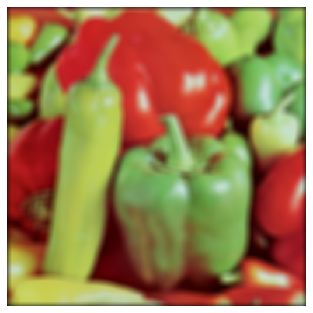

In [12]:
plt.imshow(new_image)
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

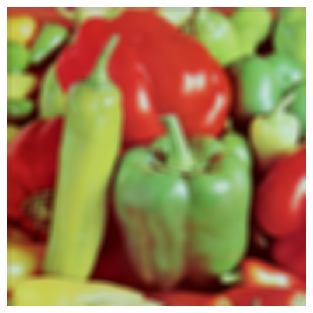

In [13]:
gauss_blur = cv2.GaussianBlur(image,(15,15),10)
plt.imshow(gauss_blur)
plt.grid(False)
plt.xticks([])
plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text yticklabel objects>)

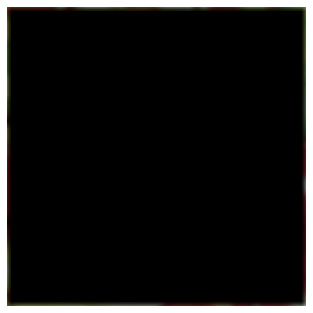

In [18]:
# diff = new_image- gauss_blur
plt.imshow(-diff)
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [16]:
np.min(diff)

-0.5828389091042505

In [17]:
np.max(diff)

4.440892098500626e-16